In [17]:
import pysindy as ps
from data._main import get_dataset
from omegaconf import OmegaConf
from utils import NEURONS_302
import numpy as np
from testing.leandro.plots import *
from sklearn.preprocessing import MinMaxScaler
from testing.leandro.plots import *

# Synthetic Data
---

In [16]:
# Load synthetic data
data = np.load('synthetic_data.npz')
x = data['h']
J = data['J']
t = data['time']

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)


KeyboardInterrupt



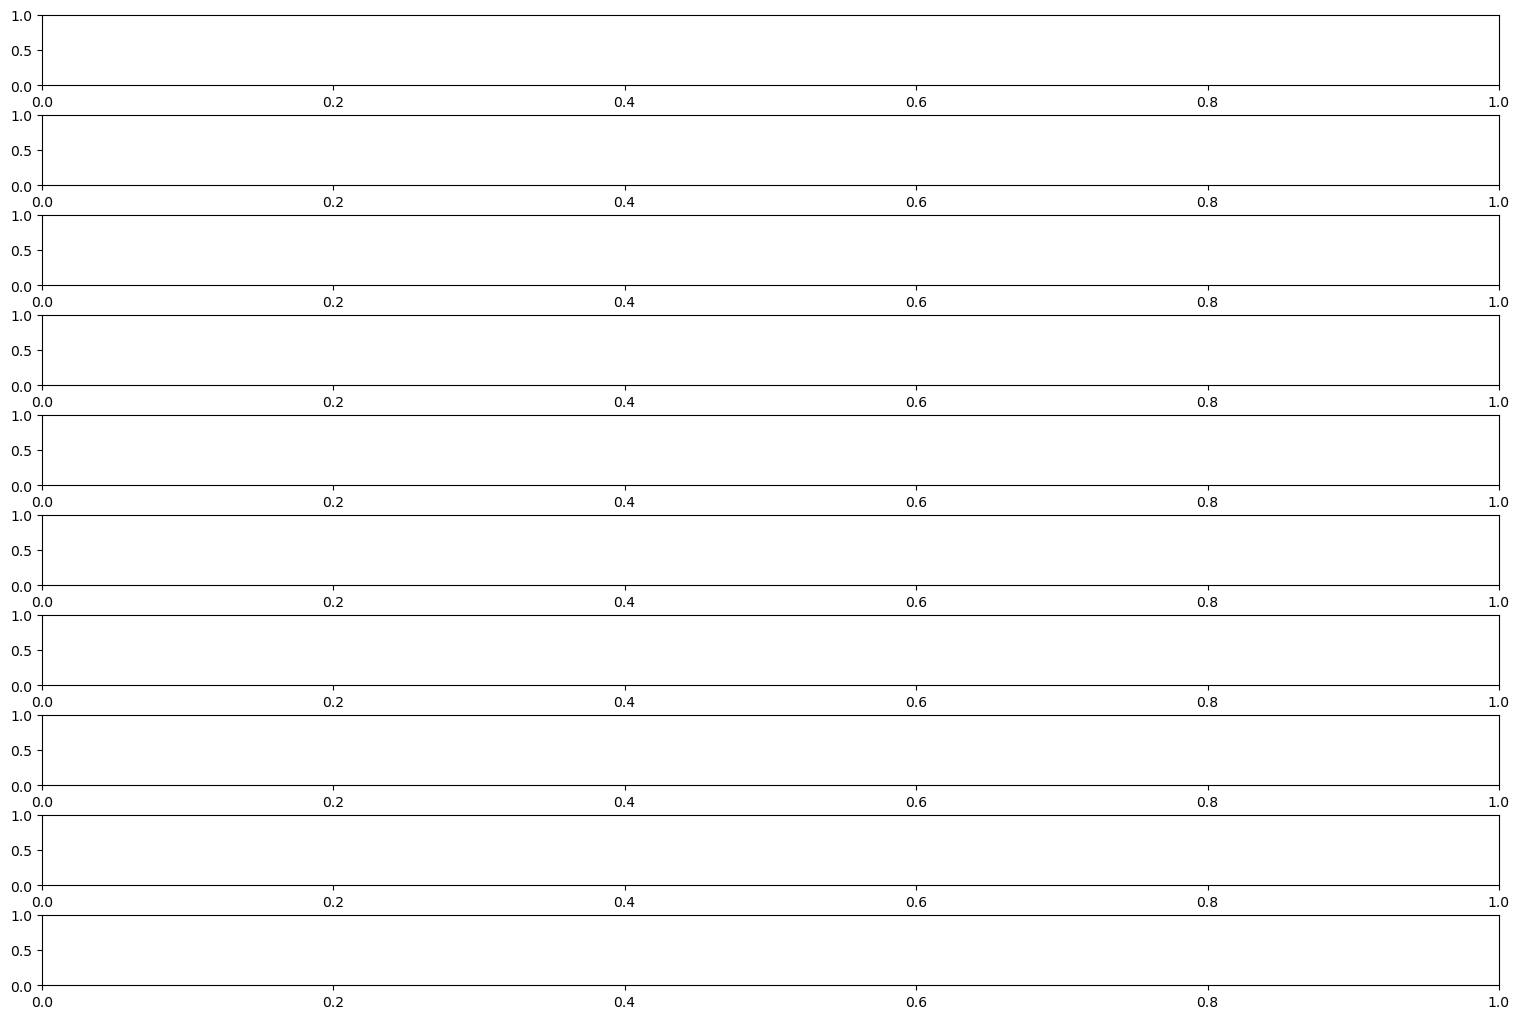

In [18]:
plot_signals(torch.tensor(x), torch.tensor(t), 10)

In [ ]:
feature_names = ['x'+str(i) for i in range(302)]
sparse_regression_optimizer = ps.STLSQ(threshold=0)  # default is lambda = 0.1
model = ps.SINDy(feature_names=feature_names, optimizer=sparse_regression_optimizer)
model.fit(x_train, t=dt)
model.print()

In [2]:
config = OmegaConf.load("/om2/user/lrvenan/worm-graph/conf/dataset.yaml")
dataset = get_dataset(config)

Chosen dataset(s): ['Uzel2022']
Num. worms: 6



In [3]:
oneWorm = dataset['worm0']
oneWorm.keys()

dict_keys(['dataset', 'smooth_method', 'calcium_data', 'smooth_calcium_data', 'residual_calcium', 'smooth_residual_calcium', 'max_timesteps', 'time_in_seconds', 'dt', 'num_neurons', 'num_named_neurons', 'num_unknown_neurons', 'named_neurons_mask', 'unknown_neurons_mask', 'neurons_mask', 'slot_to_named_neuron', 'named_neuron_to_slot', 'slot_to_unknown_neuron', 'unknown_neuron_to_slot', 'slot_to_neuron', 'neuron_to_slot'])

In [4]:
X = oneWorm['calcium_data'].detach().numpy()
dt = oneWorm['dt']
print('X shape: {}, dt: {}'.format(X.shape, dt))

X shape: (10797, 302), dt: 0.1


In [5]:
active_neurons = oneWorm['named_neurons_mask']
X_active = X[:, active_neurons]
name_active_neurons = [NEURONS_302[i] for i in range(len(active_neurons)) if active_neurons[i]]

print('Active neurons shape: {}'.format(X_active.shape))
print('Names:')
for n in name_active_neurons:
    print(n, end=', ')

Active neurons shape: (10797, 58)
Names:
AIBL, AIBR, ALA, ALNL, ALNR, AS10, ASKL, ASKR, AVAL, AVAR, AVBL, AVBR, AVEL, AVER, AVFL, AVFR, DA1, DA7, DA9, DB1, DB2, DB7, DVA, DVC, PDA, PHAR, PVNL, PVNR, RIBL, RIBR, RID, RIMR, RIS, RIVR, RMED, RMEL, RMEV, SABD, SABVL, SABVR, SIADL, SIADR, SIAVL, SIAVR, SMDDL, SMDDR, SMDVR, URYDL, URYDR, URYVL, URYVR, VA1, VA11, VA12, VB1, VB11, VB2, VD13, 

In [6]:
# Check if we have data of some neurons

searched_neurons = ['AIY', 'AVA', 'AVB', 'RIF', 'SMD', 'DVC']

for n in searched_neurons:
    if n in name_active_neurons:
        print('Found {}'.format(n))
    else:
        print('Not found {}'.format(n))

np.where(np.array(name_active_neurons) == 'DVC')

Not found AIY
Not found AVA
Not found AVB
Not found RIF
Not found SMD
Found DVC


(array([23]),)

In [7]:
fr_library_functions = [
    lambda x, y: -x + np.tanh(y),
]

fr_library_functions_names = [
    lambda x, y: '-' + x + 'tanh(' + y + ')',
]

mylib = ps.CustomLibrary(
    library_functions=fr_library_functions,
    function_names=fr_library_functions_names
)